<a href="https://colab.research.google.com/github/Amruth-Reddy/Collab_Practice_Projects/blob/main/Classification_Model_For_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib scikit-learn seaborn

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(url, sep=";")

In [ ]:
data['quality_label'] = data['quality'].apply(lambda x: 'high' if x >= 6 else 'low')
data.drop('quality', axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop('quality_label', axis=1)
y = data['quality_label']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.84


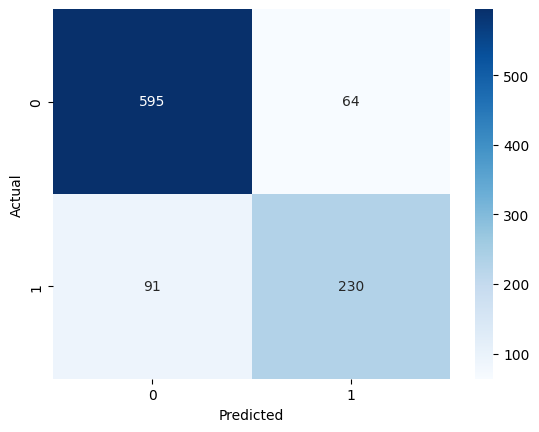

              precision    recall  f1-score   support

        high       0.87      0.90      0.88       659
         low       0.78      0.72      0.75       321

    accuracy                           0.84       980
   macro avg       0.82      0.81      0.82       980
weighted avg       0.84      0.84      0.84       980



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))
